<a href="https://colab.research.google.com/github/akshit0201/AndroidStudioProjects/blob/master/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Washing machine  model:**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
tf.__version__

'2.6.0'

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.0 MB/s 


In [ ]:
#loading the values
import numpy as np
fil = np.load('/gdrive/MyDrive/washdish.npz',allow_pickle=True)

timetr,atr,dtr,wtr,dbtr,wbtr = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5']

In [ ]:
import numpy as np
fil = np.load('/gdrive/MyDrive/washdishtest.npz',allow_pickle=True)

timetest,atest,dtest,wtest,dbtest,wbtest = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5']

In [ ]:

wtr = np.reshape(wtr,[-1,512,1])
wbtr = np.reshape(wbtr,[-1,512,1])

In [ ]:

wtest = np.reshape(wtest,[-1,512,1])
wbtest = np.reshape(wbtest,[-1,512,1])

In [ ]:
def prepare(a,b):
  temp = []
  t = np.shape(a)[0]
  for i in range(t):
    temp.append(list(zip(a[i],b[i])))
  return np.array(temp)


In [ ]:
traindata = prepare(timetr,atr)

In [ ]:
testdata = prepare(timetest,atest)

In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": traindata},
        {"ed": wtr, "sd": wbtr},
    )
)
train_dataset = train_dataset.batch(100)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": testdata},
        {"ed": wtest, "sd": wbtest},
    )
)
test_dataset = test_dataset.batch(100)

NameError: ignored

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Input, Model


input1 = tf.keras.layers.Input(shape=(512,2),name="input_1")
#input2 = tf.keras.layers.Input(shape=(None,512),name="input_2")
#inputs= tf.keras.layers.Concatenate(axis=0)([input1, input2])
#inputs = tf.reshape(input1,[-1,512,1])
x = tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding="causal", activation="relu",input_shape=(512,2))(input1)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Dense(128, activation="tanh")(x)
o1 = tf.keras.layers.Dense(1, activation="linear",name="ed")(x)
o2 = tf.keras.layers.Dense(1, activation="sigmoid",name="sd")(x)

model = Model(inputs=[input1], outputs=[o1, o2])

model.compile(loss={'ed': 'mean_squared_error', 
                    'sd': 'binary_crossentropy'},
              loss_weights={'ed':0.4,
                            'sd':0.6},
              optimizer='adam',
              metrics={'ed': tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None),
                       'sd': tfa.metrics.F1Score(name="f1_score",num_classes=2, threshold=0.5, average = "micro")})

In [ ]:
#Training for washing machine
import os
checkpoint = '/gdrive/MyDrive/washing.ckpt'
cdir = os.path.dirname(checkpoint)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint, 
    verbose=1, 
    monitor='loss',
    save_weights_only=False,
    save_best_only=True)



history = model.fit(train_dataset,epochs=3,callbacks=[cp_callback],verbose=1)

Epoch 1/3
79/79 [==============================] - 1514s 19s/step - loss: 0.4880 - ed_loss: 0.8929 - sd_loss: 0.2180 - ed_mean_absolute_error: 0.2477 - sd_f1_score: 0.0311

Epoch 00001: loss improved from inf to 0.48797, saving model to /gdrive/MyDrive/washing.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/washing.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/washing.ckpt/assets


Epoch 2/3
79/79 [==============================] - 1492s 19s/step - loss: 0.4553 - ed_loss: 0.8576 - sd_loss: 0.1870 - ed_mean_absolute_error: 0.2198 - sd_f1_score: 0.0031

Epoch 00002: loss improved from 0.48797 to 0.45525, saving model to /gdrive/MyDrive/washing.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/washing.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/washing.ckpt/assets


Epoch 3/3
79/79 [==============================] - 1513s 19s/step - loss: 0.4502 - ed_loss: 0.8473 - sd_loss: 0.1855 - ed_mean_absolute_error: 0.2088 - sd_f1_score: 0.0014

Epoch 00003: loss improved from 0.45525 to 0.45019, saving model to /gdrive/MyDrive/washing.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/washing.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/washing.ckpt/assets


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 512, 16)      112         input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 512, 256)     112128      conv1d_3[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 512, 512)     789504      bidirectional_6[0][0]            
____________________________________________________________________________________________

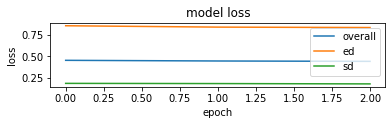

In [ ]:
#plotting loss metrics 
import matplotlib.pyplot as plot
plot.subplot(3,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['ed_loss'])
plot.plot(history.history['sd_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['overall', 'ed','sd'], loc='upper right')

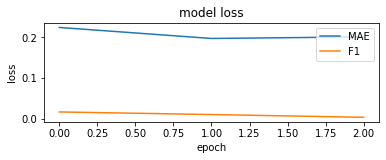

In [ ]:
#plotting metrics
plot.subplot(2,1,2)
plot.plot(history.history['ed_mean_absolute_error'])
plot.plot(history.history['sd_f1_score'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['MAE', 'F1'], loc='upper right')

In [ ]:
result = model.evaluate(test_dataset)

34/34 [==============================] - 180s 5s/step - loss: 0.5800 - ed_loss: 1.0549 - sd_loss: 0.2634 - ed_mean_absolute_error: 0.2828 - sd_f1_score: 0.0000e+00


In [ ]:
dict(zip(model.metrics_names, result))


   Washing Machine Model Performance
{'ed_loss': 1.054917573928833,
'ed_mean_absolute_error': 0.2827630639076233,
'loss': 0.5799944996833801,
'sd_f1_score': 0.512915658957332,
'sd_loss': 0.26337915658950806}


In [ ]:
pred = model.predict(testdata,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


105/105 [==============================] - 312s 3s/step


In [ ]:
wtestnew 

array([-22.563564], dtype=float32)

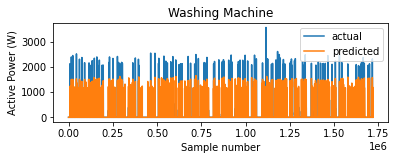

In [ ]:
import matplotlib.pyplot as plot

prednew = (pred[0]*w.std())+w.mean()
wtestnew = (wtest*w.std())+w.mean()
# atest = (atest*a.std())+a.mean()

predicted = prednew * pred[1]
plot.subplot(2,1,2)
plot.plot(wtestnew.flatten())
plot.plot(predicted.flatten())
#plot.plot(atest.flatten())
plot.title('Washing Machine')
plot.ylabel('Active Power (W)')
plot.xlabel('Sample number')
plot.legend(['actual','predicted'], loc='upper right')

In [ ]:
#loading the model
import os
import tensorflow_addons as tfa
checkpoint = '/gdrive/MyDrive/washing.ckpt'
cdir = os.path.dirname(checkpoint)
latest = tf.train.latest_checkpoint(cdir)
from tensorflow import keras
model = keras.models.load_model('/gdrive/MyDrive/washing.ckpt',custom_objects={"f1_score":tfa.metrics.F1Score})

# **Dishwasher Model:**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
!pip install -U tensorflow-addons

In [ ]:
#loading the values
import numpy as np
fil = np.load('/gdrive/MyDrive/washdish.npz',allow_pickle=True)

timetr,atr,dtr,wtr,dbtr,wbtr = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5']

In [ ]:
import numpy as np
fil = np.load('/gdrive/MyDrive/washdishtest.npz',allow_pickle=True)

timetest,atest,dtest,wtest,dbtest,wbtest = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5']

In [ ]:
np.shape(dtr) == np.shape(dbtr)

False

In [ ]:
dtr = np.reshape(dtr,[-1,512,1])
dbtr = np.reshape(dbtr,[-1,512,1])

In [ ]:
dtest = np.reshape(dtest,[-1,512,1])
dbtest = np.reshape(dbtest,[-1,512,1])

In [ ]:
def prepare(a,b):
  temp = []
  t = np.shape(a)[0]
  for i in range(t):
    temp.append(list(zip(a[i],b[i])))
  return np.array(temp)


In [ ]:
traindata = prepare(timetr,atr)

In [ ]:
testdata = prepare(timetest,atest)

In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": traindata},
        {"ed": dtr, "sd": dbtr},
    )
)
train_dataset = train_dataset.batch(100)

In [ ]:
np.shape(wbtr)

(7838, 512, 1)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": testdata},
        {"ed": dtest, "sd": dbtest},
    )
)
test_dataset = test_dataset.batch(100)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Input, Model


input1 = tf.keras.layers.Input(shape=(512,2),name="input_1")
#input2 = tf.keras.layers.Input(shape=(None,512),name="input_2")
#inputs= tf.keras.layers.Concatenate(axis=0)([input1, input2])
#inputs = tf.reshape(input1,[-1,512,1])
x = tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding="causal", activation="relu",input_shape=(512,2))(input1)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Dense(128, activation="tanh")(x)
o1 = tf.keras.layers.Dense(1, activation="linear",name="ed")(x)
o2 = tf.keras.layers.Dense(1, activation="sigmoid",name="sd")(x)

model = Model(inputs=[input1], outputs=[o1, o2])

model.compile(loss={'ed': 'mean_squared_error', 
                    'sd': 'binary_crossentropy'},
              loss_weights={'ed':0.4,
                            'sd':0.6},
              optimizer='adam',
              metrics={'ed': tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None),
                       'sd': tfa.metrics.F1Score(name="f1_score",num_classes=2, threshold=0.5, average = "micro")})

In [ ]:
#Training for washing machine
import os
checkpoint = '/gdrive/MyDrive/dishwash.ckpt'
cdir = os.path.dirname(checkpoint)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint, 
    verbose=1, 
    monitor='loss',
    save_weights_only=False,
    save_best_only=True)



history = model.fit(train_dataset,epochs=5,callbacks=[cp_callback],verbose=1)

Epoch 1/5
79/79 [==============================] - 1519s 19s/step - loss: 0.4072 - ed_loss: 0.6432 - sd_loss: 0.2498 - ed_mean_absolute_error: 0.2898 - sd_f1_score: 0.2171

Epoch 00001: loss improved from inf to 0.40719, saving model to /gdrive/MyDrive/dishwash.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


Epoch 2/5
79/79 [==============================] - 1504s 19s/step - loss: 0.3453 - ed_loss: 0.5456 - sd_loss: 0.2117 - ed_mean_absolute_error: 0.2491 - sd_f1_score: 0.2741

Epoch 00002: loss improved from 0.40719 to 0.34527, saving model to /gdrive/MyDrive/dishwash.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


Epoch 3/5
79/79 [==============================] - 1502s 19s/step - loss: 0.3115 - ed_loss: 0.4855 - sd_loss: 0.1956 - ed_mean_absolute_error: 0.2166 - sd_f1_score: 0.3831

Epoch 00003: loss improved from 0.34527 to 0.31154, saving model to /gdrive/MyDrive/dishwash.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


Epoch 4/5
79/79 [==============================] - 1493s 19s/step - loss: 0.2431 - ed_loss: 0.4156 - sd_loss: 0.1281 - ed_mean_absolute_error: 0.2066 - sd_f1_score: 0.6534

Epoch 00004: loss improved from 0.31154 to 0.24309, saving model to /gdrive/MyDrive/dishwash.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


Epoch 5/5
79/79 [==============================] - 1495s 19s/step - loss: 0.2142 - ed_loss: 0.3772 - sd_loss: 0.1055 - ed_mean_absolute_error: 0.2056 - sd_f1_score: 0.7077

Epoch 00005: loss improved from 0.24309 to 0.21417, saving model to /gdrive/MyDrive/dishwash.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/dishwash.ckpt/assets


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 2)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 16)      112         input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 512, 256)     112128      conv1d[0][0]                     
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 512, 512)     789504      bidirectional[0][0]              
______________________________________________________________________________________________

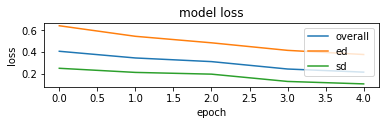

In [ ]:
#plotting loss metrics 
import matplotlib.pyplot as plot
plot.subplot(3,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['ed_loss'])
plot.plot(history.history['sd_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['overall', 'ed','sd'], loc='upper right')

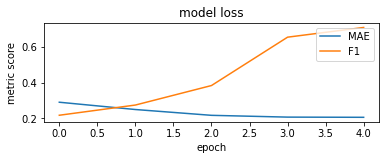

In [ ]:
#plotting metrics
plot.subplot(2,1,2)
plot.plot(history.history['ed_mean_absolute_error'])
plot.plot(history.history['sd_f1_score'])
plot.title('model loss')
plot.ylabel('metric score')
plot.xlabel('epoch')
plot.legend(['MAE', 'F1'], loc='upper right')

In [ ]:
result = model.evaluate(test_dataset)

34/34 [==============================] - 196s 6s/step - loss: 0.4730 - ed_loss: 0.7970 - sd_loss: 0.2570 - ed_mean_absolute_error: 0.2053 - sd_f1_score: 0.3965


In [ ]:
dict(zip(model.metrics_names, result))

   Dishwasher Model Performance
{'ed_loss': 0.7969693541526794,
'ed_mean_absolute_error': 0.20528985559940338,
'loss': 0.4729871153831482,
'sd_f1_score': 0.7964914381504059,
'sd_loss': 0.25699901580810547}'


In [ ]:
pred = model.predict(testdata,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


105/105 [==============================] - 397s 4s/step


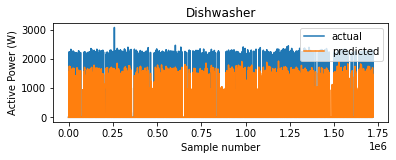

In [ ]:
import matplotlib.pyplot as plot

prednew = (pred[0]*d.std())+d.mean()
dtestnew = (dtest*d.std())+d.mean()
# atest = (atest*a.std())+a.mean()

pred[1] = (pred[1]>0.5).astype(np.float)
predicted = prednew * pred[1]
plot.subplot(2,1,2)
plot.plot(dtestnew.flatten())
plot.plot(predicted.flatten())
#plot.plot(atest.flatten())
plot.title('Dishwasher')
plot.ylabel('Active Power (W)')
plot.xlabel('Sample number')
plot.legend(['actual', 'predicted'], loc='upper right')

In [ ]:
import os
import tensorflow_addons as tfa
checkpoint = '/gdrive/MyDrive/dishwash.ckpt'
cdir = os.path.dirname(checkpoint)
latest = tf.train.latest_checkpoint(cdir)
from tensorflow import keras
model = keras.models.load_model('/gdrive/MyDrive/dishwash.ckpt',custom_objects={"f1_score":tfa.metrics.F1Score})

# **Toaster Model:**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.1 MB/s 


In [ ]:
#loading the values
import numpy as np
fil = np.load('/gdrive/MyDrive/toastmicro.npz',allow_pickle=True)

timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5'],fil['arr_6'],fil['arr_7']

In [ ]:
import numpy as np
fil = np.load('/gdrive/MyDrive/toastmicrotest.npz',allow_pickle=True)

timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5'],fil['arr_6'],fil['arr_7']

In [ ]:
ttr = np.reshape(ttr,[-1,128,1])
tbtr = np.reshape(tbtr,[-1,128,1])

In [ ]:
ttest = np.reshape(ttest,[-1,128,1])
tbtest = np.reshape(tbtest,[-1,128,1])

In [ ]:
def prepare(a,b):
  temp = []
  t = np.shape(a)[0]
  for i in range(t):
    temp.append(list(zip(a[i],b[i])))
  return np.array(temp)


In [ ]:
traindata = prepare(timetr,atr)

In [ ]:
testdata = prepare(timetest,atest)

In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": traindata},
        {"ed": ttr, "sd": tbtr},
    )
)
train_dataset = train_dataset.batch(100)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": testdata},
        {"ed": ttest, "sd": tbtest},
    )
)
test_dataset = test_dataset.batch(100)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Input, Model


input1 = tf.keras.layers.Input(shape=(128,2),name="input_1")
#input2 = tf.keras.layers.Input(shape=(None,512),name="input_2")
#inputs= tf.keras.layers.Concatenate(axis=0)([input1, input2])
#inputs = tf.reshape(input1,[-1,512,1])
x = tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding="causal", activation="relu",input_shape=(128,2))(input1)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Dense(128, activation="tanh")(x)
o1 = tf.keras.layers.Dense(1, activation="linear",name="ed")(x)
o2 = tf.keras.layers.Dense(1, activation="sigmoid",name="sd")(x)

model = Model(inputs=[input1], outputs=[o1, o2])

model.compile(loss={'ed': 'mean_squared_error', 
                    'sd': 'binary_crossentropy'},
              loss_weights={'ed':0.4,
                            'sd':0.6},
              optimizer='adam',
              metrics={'ed': tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None),
                       'sd': tfa.metrics.F1Score(name="f1_score",num_classes=2, threshold=0.5, average = "micro")})

In [ ]:
#Training for washing machine
import os
checkpoint = '/gdrive/MyDrive/toaster.ckpt'
cdir = os.path.dirname(checkpoint)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint, 
    verbose=1, 
    monitor='loss',
    save_weights_only=False,
    save_best_only=True)



history = model.fit(train_dataset,epochs=5,callbacks=[cp_callback],verbose=1)

Epoch 1/5
314/314 [==============================] - 1430s 5s/step - loss: 0.2100 - ed_loss: 0.4749 - sd_loss: 0.0334 - ed_mean_absolute_error: 0.1532 - sd_f1_score: 0.5473

Epoch 00001: loss improved from inf to 0.20996, saving model to /gdrive/MyDrive/toaster.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


Epoch 2/5
314/314 [==============================] - 1431s 5s/step - loss: 0.1015 - ed_loss: 0.2322 - sd_loss: 0.0143 - ed_mean_absolute_error: 0.0724 - sd_f1_score: 0.8154

Epoch 00002: loss improved from 0.20996 to 0.10150, saving model to /gdrive/MyDrive/toaster.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


Epoch 3/5
314/314 [==============================] - 1423s 5s/step - loss: 0.0893 - ed_loss: 0.2042 - sd_loss: 0.0127 - ed_mean_absolute_error: 0.0602 - sd_f1_score: 0.8379

Epoch 00003: loss improved from 0.10150 to 0.08930, saving model to /gdrive/MyDrive/toaster.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


Epoch 4/5
314/314 [==============================] - 1423s 5s/step - loss: 0.0777 - ed_loss: 0.1771 - sd_loss: 0.0114 - ed_mean_absolute_error: 0.0468 - sd_f1_score: 0.8572

Epoch 00004: loss improved from 0.08930 to 0.07765, saving model to /gdrive/MyDrive/toaster.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


Epoch 5/5
314/314 [==============================] - 1424s 5s/step - loss: 0.0732 - ed_loss: 0.1670 - sd_loss: 0.0108 - ed_mean_absolute_error: 0.0433 - sd_f1_score: 0.8649

Epoch 00005: loss improved from 0.07765 to 0.07325, saving model to /gdrive/MyDrive/toaster.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/toaster.ckpt/assets


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 128, 16)      112         input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 128, 256)     112128      conv1d_2[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 128, 512)     789504      bidirectional_4[0][0]            
____________________________________________________________________________________________

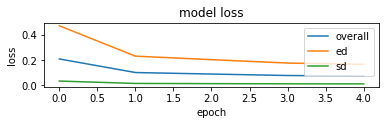

In [ ]:
#plotting loss metrics 
import matplotlib.pyplot as plot
plot.subplot(3,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['ed_loss'])
plot.plot(history.history['sd_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['overall', 'ed','sd'], loc='upper right')

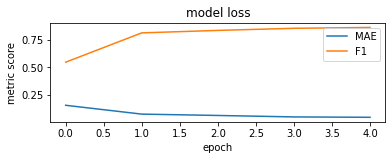

In [ ]:
#plotting metrics
plot.subplot(2,1,2)
plot.plot(history.history['ed_mean_absolute_error'])
plot.plot(history.history['sd_f1_score'])
plot.title('model loss')
plot.ylabel('metric score')
plot.xlabel('epoch')
plot.legend(['MAE', 'F1'], loc='upper right')

In [ ]:
result = model.evaluate(test_dataset)

135/135 [==============================] - 199s 1s/step - loss: 0.0850 - ed_loss: 0.1889 - sd_loss: 0.0157 - ed_mean_absolute_error: 0.0461 - sd_f1_score: 0.8206


In [ ]:
dict(zip(model.metrics_names, result))


   Toaster Model Performance
{'ed_loss': 0.18885447084903717,
'ed_mean_absolute_error': 0.046101465821266174,
'loss': 0.08496434986591339,
'sd_f1_score': 0.8205962777137756,
'sd_loss': 0.015704235062003136}


In [ ]:
pred = model.predict(testdata,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


420/420 [==============================] - 363s 863ms/step


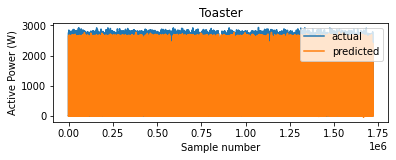

In [ ]:
import matplotlib.pyplot as plot

prednew = (pred[0]*t.std())+t.mean()
ttestnew = (ttest*t.std())+t.mean()
# atest = (atest*a.std())+a.mean()

pred[1] = (pred[1]>0.5).astype(np.float)
predicted = prednew * pred[1]
plot.subplot(2,1,2)


plot.plot(ttestnew.flatten())
plot.plot(predicted.flatten())
#plot.plot(atest.flatten())
plot.title('Toaster')
plot.ylabel('Active Power (W)')
plot.xlabel('Sample number')
plot.legend(['actual', 'predicted'], loc='upper right')

In [ ]:
import os
import tensorflow_addons as tfa
checkpoint = '/gdrive/MyDrive/toaster.ckpt'
cdir = os.path.dirname(checkpoint)
latest = tf.train.latest_checkpoint(cdir)
from tensorflow import keras
model = keras.models.load_model('/gdrive/MyDrive/toaster.ckpt',custom_objects={"f1_score":tfa.metrics.F1Score})

# **Microwave model:**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
!pip install -U tensorflow-addons

In [ ]:
#loading the values
import numpy as np
fil = np.load('/gdrive/MyDrive/toastmicro.npz',allow_pickle=True)

timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5'],fil['arr_6'],fil['arr_7']

In [ ]:
import numpy as np
fil = np.load('/gdrive/MyDrive/toastmicrotest.npz',allow_pickle=True)

timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5'],fil['arr_6'],fil['arr_7']

In [ ]:
mtr = np.reshape(mtr,[-1,128,1])
mbtr = np.reshape(mbtr,[-1,128,1])

In [ ]:
mtest = np.reshape(mtest,[-1,128,1])
mbtest = np.reshape(mbtest,[-1,128,1])

In [ ]:
def prepare(a,b):
  temp = []
  t = np.shape(a)[0]
  for i in range(t):
    temp.append(list(zip(a[i],b[i])))
  return np.array(temp)


In [ ]:
traindata = prepare(timetr,atr)

In [ ]:
testdata = prepare(timetest,atest)

In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": traindata},
        {"ed": mtr, "sd": mbtr},
    )
)
train_dataset = train_dataset.batch(100)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": testdata},
        {"ed": mtest, "sd": mbtest},
    )
)
test_dataset = test_dataset.batch(100)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Input, Model


input1 = tf.keras.layers.Input(shape=(128,2),name="input_1")
#input2 = tf.keras.layers.Input(shape=(None,512),name="input_2")
#inputs= tf.keras.layers.Concatenate(axis=0)([input1, input2])
#inputs = tf.reshape(input1,[-1,512,1])
x = tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding="causal", activation="relu",input_shape=(128,2))(input1)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Dense(128, activation="tanh")(x)
o1 = tf.keras.layers.Dense(1, activation="linear",name="ed")(x)
o2 = tf.keras.layers.Dense(1, activation="sigmoid",name="sd")(x)

model = Model(inputs=[input1], outputs=[o1, o2])

model.compile(loss={'ed': 'mean_squared_error', 
                    'sd': 'binary_crossentropy'},
              loss_weights={'ed':0.4,
                            'sd':0.6},
              optimizer='adam',
              metrics={'ed': tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None),
                       'sd': tfa.metrics.F1Score(name="f1_score",num_classes=2, threshold=0.5, average = "micro")})

In [ ]:
#Training for washing machine
import os
checkpoint = '/gdrive/MyDrive/microwave.ckpt'
cdir = os.path.dirname(checkpoint)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint, 
    verbose=1, 
    monitor='loss',
    save_weights_only=False,
    save_best_only=True)



history = model.fit(train_dataset,epochs=5,callbacks=[cp_callback],verbose=1)

Epoch 1/5
314/314 [==============================] - 1441s 5s/step - loss: 0.3631 - ed_loss: 0.8380 - sd_loss: 0.0465 - ed_mean_absolute_error: 0.1435 - sd_f1_score: 0.0055

Epoch 00001: loss improved from inf to 0.36312, saving model to /gdrive/MyDrive/microwave.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


Epoch 2/5
314/314 [==============================] - 1445s 5s/step - loss: 0.3248 - ed_loss: 0.7536 - sd_loss: 0.0389 - ed_mean_absolute_error: 0.1318 - sd_f1_score: 0.1091

Epoch 00002: loss improved from 0.36312 to 0.32478, saving model to /gdrive/MyDrive/microwave.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


Epoch 3/5
314/314 [==============================] - 1443s 5s/step - loss: 0.2899 - ed_loss: 0.6695 - sd_loss: 0.0369 - ed_mean_absolute_error: 0.1043 - sd_f1_score: 0.2220

Epoch 00003: loss improved from 0.32478 to 0.28993, saving model to /gdrive/MyDrive/microwave.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


Epoch 4/5
314/314 [==============================] - 1426s 5s/step - loss: 0.2618 - ed_loss: 0.6030 - sd_loss: 0.0344 - ed_mean_absolute_error: 0.0968 - sd_f1_score: 0.2948

Epoch 00004: loss improved from 0.28993 to 0.26183, saving model to /gdrive/MyDrive/microwave.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


Epoch 5/5
314/314 [==============================] - 1430s 5s/step - loss: 0.2479 - ed_loss: 0.5709 - sd_loss: 0.0326 - ed_mean_absolute_error: 0.0904 - sd_f1_score: 0.3468

Epoch 00005: loss improved from 0.26183 to 0.24793, saving model to /gdrive/MyDrive/microwave.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/microwave.ckpt/assets


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 128, 16)      112         input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 128, 256)     112128      conv1d_3[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 128, 512)     789504      bidirectional_6[0][0]            
____________________________________________________________________________________________

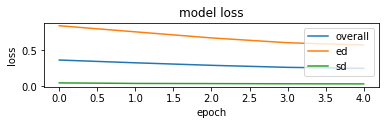

In [ ]:
#plotting loss metrics 
import matplotlib.pyplot as plot
plot.subplot(3,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['ed_loss'])
plot.plot(history.history['sd_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['overall', 'ed','sd'], loc='upper right')

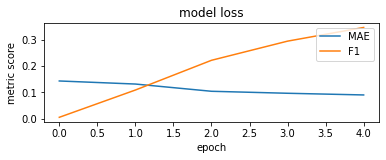

In [ ]:
#plotting metrics
plot.subplot(2,1,2)
plot.plot(history.history['ed_mean_absolute_error'])
plot.plot(history.history['sd_f1_score'])
plot.title('model loss')
plot.ylabel('metric score')
plot.xlabel('epoch')
plot.legend(['MAE', 'F1'], loc='upper right')

In [ ]:
result = model.evaluate(test_dataset)

135/135 [==============================] - 198s 1s/step - loss: 0.2717 - ed_loss: 0.5928 - sd_loss: 0.0576 - ed_mean_absolute_error: 0.0928 - sd_f1_score: 0.2157


In [ ]:
dict(zip(model.metrics_names, result))


   Microwave Model Performance
{'ed_loss': 0.5927904844284058,
'ed_mean_absolute_error': 0.09281656891107559,
'loss': 0.2716723382472992,
'sd_f1_score': 0.71565493941307068,
'sd_loss': 0.05759339779615402}


In [ ]:
pred = model.predict(testdata,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


420/420 [==============================] - 366s 871ms/step


In [ ]:
pred[1].shape

(13437, 128, 1)

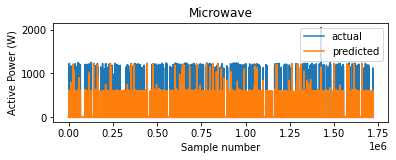

In [ ]:
import matplotlib.pyplot as plot

prednew = (pred[0]*m.std())+m.mean()
mtestnew = (mtest*m.std())+m.mean()
# atest = (atest*a.std())+a.mean()

pred[1] = (pred[1]>0.5).astype(np.float)
predicted = prednew * pred[1]
plot.subplot(2,1,2)
plot.plot(mtestnew.flatten())
plot.plot(predicted.flatten())
#plot.plot(atest.flatten())
plot.title('Microwave')
plot.ylabel('Active Power (W)')
plot.xlabel('Sample number')
plot.legend(['actual', 'predicted'], loc='upper right')

In [ ]:
import os
import tensorflow_addons as tfa
checkpoint = '/gdrive/MyDrive/microwave.ckpt'
cdir = os.path.dirname(checkpoint)
latest = tf.train.latest_checkpoint(cdir)
from tensorflow import keras
model = keras.models.load_model('/gdrive/MyDrive/microwave.ckpt',custom_objects={"f1_score":tfa.metrics.F1Score})

# **Kettle Model:**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
#loading the values
import numpy as np
fil = np.load('/gdrive/MyDrive/toastmicro.npz',allow_pickle=True)

timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5'],fil['arr_6'],fil['arr_7']

In [ ]:
import numpy as np
fil = np.load('/gdrive/MyDrive/toastmicrotest.npz',allow_pickle=True)

timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5'],fil['arr_6'],fil['arr_7']

In [ ]:
ktr = np.reshape(ktr,[-1,128,1])
kbtr = np.reshape(kbtr,[-1,128,1])

In [ ]:
ktest = np.reshape(ktest,[-1,128,1])
kbtest = np.reshape(kbtest,[-1,128,1])

In [ ]:
def prepare(a,b):
  temp = []
  t = np.shape(a)[0]
  for i in range(t):
    temp.append(list(zip(a[i],b[i])))
  return np.array(temp)


In [ ]:
traindata = prepare(timetr,atr)

In [ ]:
testdata = prepare(timetest,atest)

In [ ]:

train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": traindata},
        {"ed": ktr, "sd": kbtr},
    )
)
train_dataset = train_dataset.batch(100)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"input_1": testdata},
        {"ed": ktest, "sd": kbtest},
    )
)
test_dataset = test_dataset.batch(100)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Input, Model


input1 = tf.keras.layers.Input(shape=(128,2),name="input_1")
#input2 = tf.keras.layers.Input(shape=(None,512),name="input_2")
#inputs= tf.keras.layers.Concatenate(axis=0)([input1, input2])
#inputs = tf.reshape(input1,[-1,512,1])
x = tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding="causal", activation="relu",input_shape=(128,2))(input1)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, activation="tanh", return_sequences=True))(x)
x = tf.keras.layers.Dense(128, activation="tanh")(x)
o1 = tf.keras.layers.Dense(1, activation="linear",name="ed")(x)
o2 = tf.keras.layers.Dense(1, activation="sigmoid",name="sd")(x)

model = Model(inputs=[input1], outputs=[o1, o2])

model.compile(loss={'ed': 'mean_squared_error', 
                    'sd': 'binary_crossentropy'},
              loss_weights={'ed':0.4,
                            'sd':0.6},
              optimizer='adam',
              metrics={'ed': tf.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None),
                       'sd': tfa.metrics.F1Score(name="f1_score",num_classes=2, threshold=0.5, average = "micro")})

In [ ]:
#Training for washing machine
import os
checkpoint = '/gdrive/MyDrive/kettle.ckpt'
cdir = os.path.dirname(checkpoint)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint, 
    verbose=1, 
    monitor='loss',
    save_weights_only=False,
    save_best_only=True)



history = model.fit(train_dataset,epochs=5,callbacks=[cp_callback],verbose=1)

Epoch 1/5
314/314 [==============================] - 1401s 4s/step - loss: 0.3870 - ed_loss: 0.9252 - sd_loss: 0.0282 - ed_mean_absolute_error: 0.1260 - sd_f1_score: 0.0000e+00

Epoch 00001: loss improved from inf to 0.38699, saving model to /gdrive/MyDrive/kettle.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


Epoch 2/5
314/314 [==============================] - 1387s 4s/step - loss: 0.3519 - ed_loss: 0.8485 - sd_loss: 0.0209 - ed_mean_absolute_error: 0.1195 - sd_f1_score: 0.0678

Epoch 00002: loss improved from 0.38699 to 0.35191, saving model to /gdrive/MyDrive/kettle.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


Epoch 3/5
314/314 [==============================] - 1379s 4s/step - loss: 0.3243 - ed_loss: 0.7760 - sd_loss: 0.0232 - ed_mean_absolute_error: 0.1023 - sd_f1_score: 0.1565

Epoch 00003: loss improved from 0.35191 to 0.32433, saving model to /gdrive/MyDrive/kettle.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


Epoch 4/5
314/314 [==============================] - 1383s 4s/step - loss: 0.3255 - ed_loss: 0.7844 - sd_loss: 0.0195 - ed_mean_absolute_error: 0.0997 - sd_f1_score: 0.0835

Epoch 00004: loss did not improve from 0.32433
Epoch 5/5
314/314 [==============================] - 1374s 4s/step - loss: 0.2870 - ed_loss: 0.6890 - sd_loss: 0.0190 - ed_mean_absolute_error: 0.0960 - sd_f1_score: 0.2343

Epoch 00005: loss improved from 0.32433 to 0.28700, saving model to /gdrive/MyDrive/kettle.ckpt


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/kettle.ckpt/assets


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 128, 16)      112         input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 128, 256)     112128      conv1d_3[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 128, 512)     789504      bidirectional_6[0][0]            
____________________________________________________________________________________________

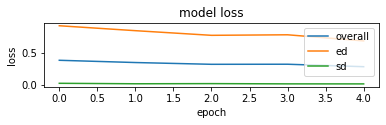

In [ ]:
#plotting loss metrics 
import matplotlib.pyplot as plot
plot.subplot(3,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['ed_loss'])
plot.plot(history.history['sd_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['overall', 'ed','sd'], loc='upper right')

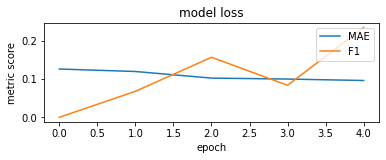

In [ ]:
#plotting metrics
plot.subplot(2,1,2)
plot.plot(history.history['ed_mean_absolute_error'])
plot.plot(history.history['sd_f1_score'])
plot.title('model loss')
plot.ylabel('metric score')
plot.xlabel('epoch')
plot.legend(['MAE', 'F1'], loc='upper right')

In [ ]:
result = model.evaluate(test_dataset)

135/135 [==============================] - 204s 2s/step - loss: 0.2711 - ed_loss: 0.6464 - sd_loss: 0.0208 - ed_mean_absolute_error: 0.1050 - sd_f1_score: 0.0000e+00


In [ ]:
dict(zip(model.metrics_names, result))


   Kettle Model Performance
{'ed_loss': 0.6464377641677856,
'ed_mean_absolute_error': 0.10497784614562988,
'loss': 0.2710680067539215,
'sd_f1_score': 0.63784614564977,
'sd_loss': 0.02082149125635624}


In [ ]:
pred = model.predict(testdata,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


420/420 [==============================] - 413s 984ms/step


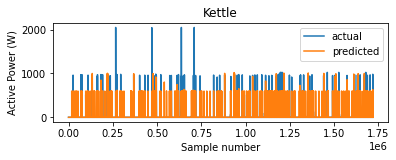

In [ ]:
import matplotlib.pyplot as plot

prednew = (pred[0]*k.std())+k.mean()
ktestnew = (ktest*k.std())+k.mean()
# atest = (atest*a.std())+a.mean()

pred[1] = (pred[1]>0.5).astype(np.float)
predicted = prednew * pred[1]
plot.subplot(2,1,2)
plot.plot(ktestnew.flatten())
plot.plot(predicted.flatten())
#plot.plot(atest.flatten())
plot.title('Kettle')
plot.ylabel('Active Power (W)')
plot.xlabel('Sample number')
plot.legend([ 'actual','predicted',], loc='upper right')

In [ ]:
import os
import tensorflow_addons as tfa
checkpoint = '/gdrive/MyDrive/kettle.ckpt'
cdir = os.path.dirname(checkpoint)
latest = tf.train.latest_checkpoint(cdir)
from tensorflow import keras
model = keras.models.load_model('/gdrive/MyDrive/kettle.ckpt',custom_objects={"f1_score":tfa.metrics.F1Score})

# **Other Things:(Nothing to do here)**

# **Extracting variables**

In [ ]:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Appliances:
Appliance 2 - Washing Machine
Appliance 3 - Dishwasher
Appliance 5 - Microwave
Appliance 8  - Kettle 
Appliance 6  - Toaster


In [ ]:
import csv

import pandas as pd



w , d , m , k , t , time , a = [],[],[],[],[],[],[] #To record load values
wb , db , mb , kb , tb = [],[],[],[],[]        #To record when the load is off or on 


mycsv = pd.read_csv('/gdrive/MyDrive/CLEAN_House2.csv')
time,a,w,d,m,k,t =  mycsv['Unix'],mycsv['Aggregate'],mycsv['Appliance2'],mycsv['Appliance3'],mycsv['Appliance5'],mycsv['Appliance6'],mycsv['Appliance8']
for i in range(len(time)):
            wb.append(1) if int(w[i])>0 else wb.append(0)
            db.append(1) if int(d[i]) >0 else db.append(0)
            mb.append(1) if int(m[i]) >0 else mb.append(0)
            kb.append(1) if int(k[i]) >0 else kb.append(0)
            tb.append(1) if int(t[i]) >0 else tb.append(0)


In [ ]:
wm = w.mean()
dm = d.mean()
mm = m.mean() 
km = k.mean()
tm = t.mean()

In [ ]:
max(m)

3072

In [ ]:
len(d) == len(db)

True

# **Preprocessing**

In [ ]:
def stan(a):
  return (a-a.mean())/a.std()

In [ ]:
a = stan(a)
w = stan(w)
d = stan(d)
m = stan(m)
k = stan(k)
t = stan(t)
tim = stan(time)
wb = pd.Series(wb)
mb = pd.Series(mb)
kb = pd.Series(kb)
tb = pd.Series(tb)
db = pd.Series(db)

In [ ]:
len(d) == len(db)


True

In [ ]:
#splitting the data
train = 4013468
wt = w.iloc[0:train]
dt = d.iloc[0:train]
mt = m.iloc[0:train]
kt = k.iloc[0:train]
tt = t.iloc[0:train]
timt = tim.iloc[0:train]
at = a.iloc[0:train]
wbt = wb.iloc[0:train]
dbt = db.iloc[0:train]
mbt = mb.iloc[0:train]
kbt = kb.iloc[0:train]
tbt = tb.iloc[0:train]
wte = w.iloc[train:]
dte = d.iloc[train:]
mte = m.iloc[train:]
kte = k.iloc[train:]
tte = t.iloc[train:]
timte = tim.iloc[train:]
ate = a.iloc[train:]
wbte = wb.iloc[train:]
dbte = db.iloc[train:]
mbte = mb.iloc[train:]
kbte = kb.iloc[train:]
tbte = tb.iloc[train:]


In [ ]:
len(dt) == len(dbt)


True

# **Windowing:**

In [ ]:
w = 0
wtr ,dtr ,mtr ,ktr ,ttr ,timetr ,atr = [],[],[],[],[],[],[]   #To window load data during training
wbtr ,dbtr ,mbtr ,kbtr ,tbtr =[],[],[],[],[]       #To window load binary during training
wtest ,dtest ,mtest ,ktest ,ttest ,timetest ,atest = [],[],[],[],[],[],[]   #To window load data during testing
wbtest ,dbtest ,mbtest ,kbtest ,tbtest =[],[],[],[],[]       #To window load binary during testing


while(w<train-512):
  timetr.append(timt.iloc[w:w+512]) 
  atr.append(at.iloc[w:w+512])
  dtr.append(dt.iloc[w:w+512])
  wtr.append(wt.iloc[w:w+512])
  dbtr.append(dbt.iloc[w:w+512])
  wbtr.append(wbt.iloc[w:w+512])
  if w<(1720058-512):
    timetest.append(timte.iloc[w:w+512]) 
    atest.append(ate.iloc[w:w+512])
    dtest.append(dte.iloc[w:w+512])
    wtest.append(wte.iloc[w:w+512])
    dbtest.append(dbte.iloc[w:w+512])
    wbtest.append(wbte.iloc[w:w+512])
  w += 512







In [ ]:
np.shape(dtr) == np.shape(dbtr)


True

In [ ]:
from sklearn.utils import shuffle
timetr,atr,dtr,wtr,dbtr,wbtr = shuffle(timetr,atr,dtr,wtr,dbtr,wbtr, random_state=0)

In [ ]:
np.shape(dtr) == np.shape(dbtr)

True

In [ ]:
import numpy as np
np.savez_compressed('/gdrive/MyDrive/washdish',timetr,atr,dtr,wtr,dbtr,wbtr)

In [ ]:
from sklearn.utils import shuffle
timetest,atest,dtest,wtest,dbtest,wbtest = shuffle(timetest,atest,dtest,wtest,dbtest,wbtest, random_state=0)

In [ ]:
import numpy as np
np.savez_compressed('/gdrive/MyDrive/washdishtest',timetest,atest,dtest,wtest,dbtest,wbtest)

In [ ]:
fil = np.load('/gdrive/MyDrive/washdish.npz',allow_pickle=True)

timetr,atr,dtr,wtr,dbtr,wbtr = fil['arr_0'],fil['arr_1'],fil['arr_2'],fil['arr_3'],fil['arr_4'],fil['arr_5']




In [ ]:
w = 0
timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr =[],[],[],[],[],[],[],[]
timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest =[],[],[],[],[],[],[],[]
while(w<train-128):
  timetr.append(timt[w:w+128]) 
  atr.append(at[w:w+128])
  mtr.append(mt[w:w+128])
  ktr.append(kt[w:w+128])
  ttr.append(tt[w:w+128])
  mbtr.append(mbt[w:w+128])
  kbtr.append(kbt[w:w+128])
  tbtr.append(tbt[w:w+128])
  if w<(1720058-127):
    timetest.append(timt[w:w+128]) 
    atest.append(at[w:w+128])
    mtest.append(mt[w:w+128])
    ktest.append(kt[w:w+128])
    ttest.append(tt[w:w+128])
    mbtest.append(mbt[w:w+128])
    kbtest.append(kbt[w:w+128])
    tbtest.append(tbt[w:w+128])
  w += 128



In [ ]:
from sklearn.utils import shuffle
timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr = shuffle(timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr, random_state=0)

In [ ]:
timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest = shuffle(timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest,random_state=0)

In [ ]:
np.savez_compressed('/gdrive/MyDrive/toastmicro',timetr , atr , mbtr ,kbtr ,tbtr , mtr ,ktr ,ttr)

In [ ]:
np.savez_compressed('/gdrive/MyDrive/toastmicrotest',timetest , atest , mbtest ,kbtest ,tbtest , mtest ,ktest ,ttest)